* 딥러닝(테라스, 파이토치)

### 머신러닝 프레임워크(Framework) : scikit-learn
: 다양한 분류 및 회귀를 지원하며 검증하는 기능
분류, 회귀, 클러스터링, 차원축소가 가능하며 샘플데이터도 제공

### xor 연산 학습해보기

In [1]:
xor_input=[
   [0,0,0],
   [0,1,1],
   [1,0,1],
   [1,1,0],
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [2]:
import pandas as pd

In [3]:
xor_df=pd.DataFrame(xor_input)
xor_df

,0,1,2
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [4]:
# Feature data 추출
xor_data=xor_df.iloc[:,0:2]
xor_data

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


In [5]:
# Target data 추출
xor_target=xor_df.iloc[:,2]
xor_target


0    0
1    1
2    1
3    0
Name: 2, dtype: int64

# 데이터 학습과 예측하기

In [6]:
from sklearn import svm, metrics

In [7]:
# 모델만들기
clf = svm.SVC()

In [8]:
# 지도 학습시키기
clf.fit(xor_data, xor_target)

SVC()

In [9]:
# 예측구하기
pred = clf.predict(xor_data)
pred

array([0, 1, 1, 0])

In [10]:
# 정답률 구하기
clf.score(xor_data,xor_target)

1.0

# 붓꽃의 품종 분류하기

In [11]:
iris=pd.read_csv("../Data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
# 인포 보는이유는 non data와 dtype를 보기 위해서
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
# 기본통계량
# describe를 왜 하는가? 중간값50과 평균값 mean을 해석하기 위해서
# 중간값과 평균값이 비슷하면 정규분포에 가깝다

iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# NaN(Not a Number) 값 확인

iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [16]:
# iris의 Sepal.Length 의  NaN?

iris['SepalLength'].isna().sum()

np.int64(0)

In [17]:
iris.SepalLength.isna().sum()

np.int64(0)

In [18]:
# iris의 Sepal.Length와 Seapl.Width의 NaN?

iris[['SepalLength','SepalWidth']].isna().sum()

SepalLength    0
SepalWidth     0
dtype: int64

In [19]:
# Name Column의 종류?

iris['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
# 각각 몇개인가?
# Target 컬럼은 균등해야 하고, Feature 컬럼은 차이가 있어야 한다(이유는 특징이기 때문이다)

iris['Name'].value_counts()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [21]:
# Iris-setosa:red, Iris-versicolor:green, Iris-virginica:blue
# iris에 color이라는 컬럼으로 추가하기

In [22]:
color_map = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

iris['color'] = iris['Name'].map(color_map)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


In [23]:
# 산점도 산포도(scatter)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

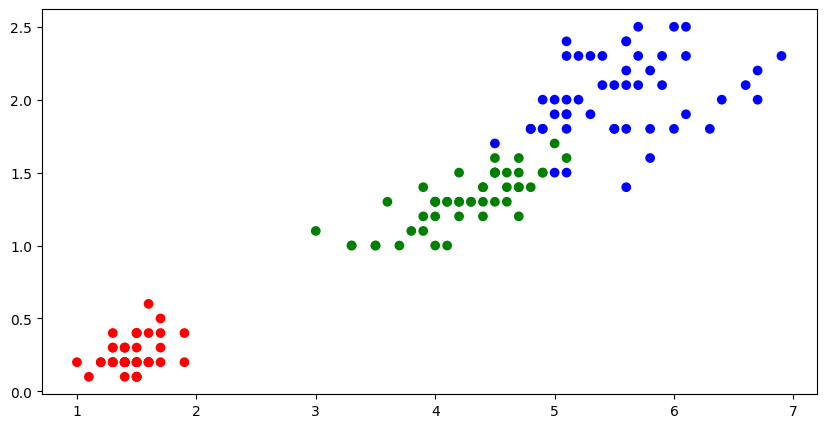

In [25]:
plt.figure(figsize=(10,5)) 
plt.scatter(
    iris.PetalLength,
    iris.PetalWidth,
    c=iris.color
)
# plt.xlbale('PetalLength')
# plt.ylbale('PetalWidth')


# 머신러닝을 위한 준비

In [26]:
# Feature Data 만들기

featureColumn=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
iris_data=iris[featureColumn]
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
iris_data=iris.iloc[:,:4]
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# Target 만들기

iris_target = iris.Name
iris_target[:6]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Name, dtype: object

In [29]:
# Target 데이터 갯수 확인( 150개 )
len(iris_target)

150

### 학습용 데이터와 테스트용 데이터로 나누기

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_data, test_data, train_target, test_target = train_test_split(
                                                    iris_data,
                                                    iris_target,
                                                    random_state=42, # 랜덤을 일정하게(강사와 맞추기위해)
                                                    test_size=0.2, # 150개중에 20%만 잡으면 30개가 나온다
                                                    stratify=iris.Name # classification 인 경우
    )

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 8 to 3
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  120 non-null    float64
 1   SepalWidth   120 non-null    float64
 2   PetalLength  120 non-null    float64
 3   PetalWidth   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 38 to 28
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  30 non-null     float64
 1   SepalWidth   30 non-null     float64
 2   PetalLength  30 non-null     float64
 3   PetalWidth   30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [34]:
train_target.info()

<class 'pandas.core.series.Series'>
Index: 120 entries, 8 to 3
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
120 non-null    object
dtypes: object(1)
memory usage: 1.9+ KB


In [35]:
test_target.info()

<class 'pandas.core.series.Series'>
Index: 30 entries, 38 to 28
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
30 non-null     object
dtypes: object(1)
memory usage: 480.0+ bytes


In [36]:
train_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,120.000000,120.000000,120.000000,120.000000
mean,5.841667,3.044167,3.770833,1.204167
std,0.840926,0.445669,1.767417,0.763825
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.750000,3.000000,4.250000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
test_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,30.000000,30.000000,30.000000,30.000000
mean,5.850000,3.093333,3.710000,1.176667
std,0.788167,0.385901,1.781582,0.773119
min,4.400000,2.300000,1.000000,0.200000
25%,5.250000,2.925000,1.550000,0.200000
50%,6.050000,3.000000,4.500000,1.400000
75%,6.500000,3.300000,5.075000,1.800000
max,7.300000,4.000000,6.300000,2.400000


# 학습시키기

In [38]:
clf=svm.SVC()

In [39]:
clf.fit(train_data,train_target) #지도학습

SVC()

In [40]:
# 예측력

clf.score(train_data,train_target)

0.9833333333333333

In [41]:
clf.score(test_data,test_target)

0.9666666666666667

In [42]:
# 예측하기

test_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
38,4.4,3.0,1.3,0.2
127,6.1,3.0,4.9,1.8
57,4.9,2.4,3.3,1.0
93,5.0,2.3,3.3,1.0
42,4.4,3.2,1.3,0.2


In [43]:
pred=clf.predict(test_data)
pred[:6]

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [44]:
test_target[:6]

38         Iris-setosa
127     Iris-virginica
57     Iris-versicolor
93     Iris-versicolor
42         Iris-setosa
56     Iris-versicolor
Name: Name, dtype: object

In [45]:
# 분류 Report

print(metrics.classification_report(test_target,pred))   # y 값, y 햇 값

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [46]:
# 길을가가다 붓꽃을 발견했다
# sepallength : 4.1, sepalwidth : 3.5, petallenth : 1.4, petalwidth: 0.2다 
# 품종을 무엇인가?

# 에러 : clf.predict([4.1, 3.5, 1.4, 0.2])
# test_data는 행렬이니까 ---> 행렬로 집어 넣어야 한다

clf.predict([[4.1, 3.5, 1.4, 0.2]])

C:\Users\avfrd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [47]:
# sepallength : 8.1, sepalwidth : 9.5, petallenth : 11.4, petalwidth: 1.2 
clf.predict([[8.1, 9.5, 11.4, 1.2]])

# 버지니카 아니다(할루시네이션이다.)
# AI는 반드시 답을 내 놓게 되어 있다. 
# 틀린 범위를 물어 봤기 때문에 틀린 답을 내 놓을 수 밖에 없다

C:\Users\avfrd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

# 분류 리포트 이해하기
번호 : [1,2,3,4,5,6]   
정답 : [음치, 음치, 음치, 음치, 정상, 정상]   
예측 : [음치, 음치, 정상, 정상, 정상, 정상]   
-----------------------------------------   
   
정확도 : 예측이 맞은 비율   
      -->  6명중 4명이 맞췄으므로 4/6 = 2/3 = 0.66   
        
정밀도 : 음치라고 예측한 사람중에 진짜 음치의 비율   
      -->  2/2 = 1.0   
   
재현율 : 전체 음치중 내가 맞춘 음치 비율    
      -->  2/4 = 0.5   
   
F1 Score : 정밀도와 재현율의 평균   
      -->  2 * 정밀도 * 재현율 / (정밀도 + 재현율) = 0.66   

In [48]:
import numpy as np

In [49]:
y=np.array([1,1,1,1,0,0])
p=np.array([1,1,0,0,0,0])

accuracy=np.mean(np.equal(y,p))
print(f'정확도: {accuracy}')

right = np.sum(y*p==1)
prsision=right / np.sum(p)
print(f'정밀도: {right}')

recall = right / np.sum(y)
print(f'재현율: {recall}')


정확도: 0.6666666666666666
정밀도: 2
재현율: 0.5


In [50]:
y=np.array([1,1,1,1,0,0])
p=np.array([1,1,0,0,0,0])

print(f'정확도: {metrics.accuracy_score(y,p)}')
print(f'정밀도: {metrics.precision_score(y,p)}')
print(f'재현율: {metrics.recall_score(y,p)}')
print(f'f1스코어: {metrics.f1_score(y,p)}')

정확도: 0.6666666666666666
정밀도: 1.0
재현율: 0.5
f1스코어: 0.6666666666666666
